### K-means classifier self-code with K=specific value

#### Note: if you want to check for different K-means, you need to put the whole code under a for loop! Not the best choice in jupyter notebooks since not able to partial checks of the code

In [1]:
import sklearn.datasets as data
import matplotlib.pyplot as plt
import numpy as np
import random

DEBUGGING = False
PLOTTING = False # Don't change unless carefully modified some fields
# define markers for up to 10 clusters
CLUSTER_MARKERS = [ 'bo', 'rv', 'c^', 'm<', 'y>', 'ks', 'bp', 'r*', 'cD', 'mP' ]

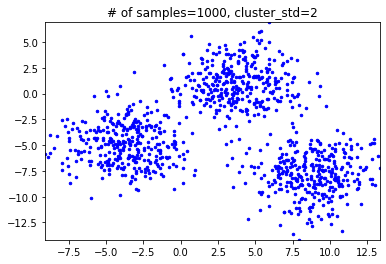

In [3]:
#-generate random data for clustering
STD=2
X, clusters = data.make_blobs( n_samples=1000, n_features=2, cluster_std=STD, random_state=12121 )
# set number of instances
M = len( X )
minX0 = np.min( X[:,0] )
maxX0 = np.max( X[:,0] )
minX1 = np.min( X[:,1] )
maxX1 = np.max( X[:,1] )

# plot the above data with differenet std's
plt.figure()
plt.plot(X[:,0], X[:,1], 'b.', markersize=5)
plt.xlim((minX0,maxX0))
plt.ylim((minX1,maxX1))
plt.title('# of samples=1000, '+'cluster_std='+str(STD))
plt.plot()
# plt.savefig('myfig.png') # save figures for different std's
plt.show()

In [4]:
K=2
#-initialise clusters by finding random points for K cluster centres,
# using the minimum and maximum values in the data set
centres = np.zeros(( K, 2 ))
for i in range( K ):
    centres[i,0] = random.uniform( minX0, maxX0 )
    centres[i,1] = random.uniform( minX1, maxX1 )
if not DEBUGGING:
    print ('initial cluster centres: ')
    for i in range( K ):
        print ('{}=({:.8f},{:.8f})'.format( i, centres[i,0], centres[i,1] ))     

initial cluster centres: 
0=(1.18217559,-4.44628971)
1=(6.84466177,-12.21249069)


In [5]:
#-compute distance from each point in the data set to each cluster
# center, using the Euclidean distance
dist    = np.zeros(( M, K )) # for each instance, distance to each cluster centre
labels  = np.zeros( M, dtype=int ) # for each instance, label of cluster with closest centre
members = [[] for i in range( K )] # lists of members of each cluster
converged = False
iters = 0
while ( not converged ):
    if DEBUGGING:
        print('iteration: ', iters)
    converged = True
    for j in range( M ):
        if DEBUGGING:
            print ('distances from (%.2f,%.2f): ' % ( X[j,0], X[j,1] ))
        for i in range( K ):
            dist[j,i] = np.sqrt( np.square( X[j,0]-centres[i,0] ) + np.square( X[j,1]-centres[i,1] ))
            if DEBUGGING:
                print ('( %d, %.4f )' % ( i, dist[j,i] ))
        this_cluster = np.argmin( dist[j,:] )
        if ( labels[j] != this_cluster ):
            converged = False
        labels[j] = this_cluster    # The resulting labels
        members[this_cluster].append( j )
    #-plot clusters / Don't plot unless carefully modified the code
    if PLOTTING:
        plt.figure()
        for j in range( 2 ):
            plt.plot( X[j,0], X[j,1], CLUSTER_MARKERS[labels[j]] )
        plt.xlabel( 'X[0]' )
        plt.ylabel( 'X[1]' )
        plt.show()
    for i in range(K):
        print ('cluster %d, size=%d' % ( i, len( members[i] )))

cluster 0, size=700
cluster 1, size=300
cluster 0, size=1400
cluster 1, size=600


In [6]:
#-compute the within-cluster score
WC = np.zeros(10)
within = np.zeros(( K ))
for i in range( K ): # loop through all clusters
    within[i] = 0.0
    for j in members[i]: # loop through members of this cluster
        # tally the distance to this cluster centre from each of its members
        within[i] += ( np.square( X[j,0]-centres[i,0] ) + np.square( X[j,1]-centres[i,1] ))
WC[K] = np.sum( within )
WC

array([    0.        ,     0.        , 70372.99601044,     0.        ,
           0.        ,     0.        ,     0.        ,     0.        ,
           0.        ,     0.        ])

In [7]:
#-compute the between-cluster score
BC = np.zeros(10)
between = np.zeros(( K ))
for i in range( K ): # loop through all clusters
    between[i] = 0.0
    for l in range( i+1, K ): # loop through remaining clusters
        # tally the distance from this cluster centre to the centres of the remaining clusters
        between[i] += ( np.square( centres[i,0]-centres[l,0] ) + np.square( centres[i,1]-centres[l,1] ))
BC[K] = np.sum( between )
BC

array([ 0.        ,  0.        , 92.37762745,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ])

In [8]:
#-compute overall clustering score
score = BC[K] / WC[K]

#-print results for this value of K
print ('K=%d  WC=%.4f  BC=%.4f  score=%.4f' % ( K, WC[K], BC[K], score ))


K=2  WC=70372.9960  BC=92.3776  score=0.0013


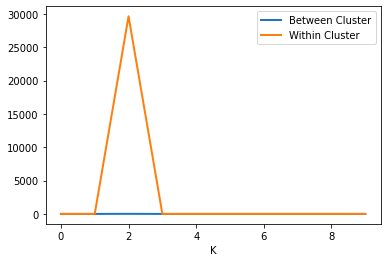

In [56]:
#-plot overall scores
plt.figure()
plt.plot( BC, linewidth=2, label='Between Cluster' )
plt.plot( WC, linewidth=2, label='Within Cluster' )
plt.xlabel( 'K' )
plt.legend( loc='best' )
plt.show()